# 평가

## 분류의 평가방법
- 정확도(Accuracy)
- 오차행렬 (Confusion Matrix)
- 정밀도(Precision)
- 민감도(=재현율)
- F1스코어
- ROC AUC


## 1. 정확도(Accuracy)
### 정확도 = 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수

- 직관적으로 모델 예측 성능을 나타내는 평가 지표
- 하지만 이진 분류의 경우 데이터의 구성에 따라 ML모델의 성능을 왜곡할 수 있다.

### ex. 건강검진 중 암을 진단하는 모델
- 99 %의 사람이 음성판정을 받고 1%의 사람만 암 진단을 받는다고 가정하자
- 이런 경우 데이터 전체를 0(음성)으로 예측하는 모델의 정확도는 99%가 된다. 
- 단순히 정확도만 보면 모델이 좋아보이지만 정작 중요한 기능인 진단을 전혀 하지 못한다. 

## 2. 오차행렬(confusion matrix)
- 오차행렬은 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고(confused) 있는지도 함께 보여준느 지표
- 즉, 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표
- 오차행렬은 4분면 행렬에서 실제 레이블 클래스값과 예측 레이블 클래스 값 기준으로 Negative와 Positive로 분류한다.
- TP, FN, FP, TN 형태로 4분면을 채운다
- True/False는 예측값과 실제 값이 "같은가/틀린가"를 의미
- Negative/Positive는 예측 결과 값이 "부정(0)/긍정(1)"을 의미

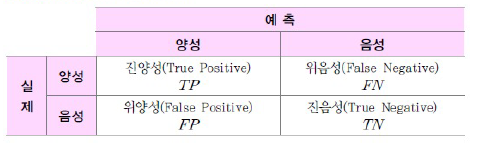

- TN : 예측값을 Negative 값 0으로 예측했고 정답인 경우
- FN : 예측값을 Negative 값 0으로 예측했고 오답인 경우
- TP : 예측값을 Positive 값 0으로 예측했고 정답인 경우
- FP : 예측값을 Positive 값 0으로 예측했고 오답인 경우

### sklearn에서는 confusion_matrix() 함수를 제공한다

### 정확도 = (TP + TN) / (TP+TN+FP+FN)

## 3. 정밀도와 민감도(재현율)

- 정밀도와 재현율은 Positive데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표
- 정밀도 = TP/ (FP + TP) : 예측을 P로 한 데이터 내에서의 정확도
- 민감도 = TP/ (FN + TP) : 실제 P 값을 가지는 데이터 내에서 정확도
- 민감도(Sensitivity)를 재현율(recall) 또는 TPR(True Positive Rate)라고도 부름

### 민감도가 중요한 경우
- 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
- 암 판단 모델 (Negative를 Positive로 예측하는 경우는 괜찮지만, Positive를 Negative로 예측하는 경우 문제가 커진다)
- 금융 사기 적발 모델도 재현율이 중요


### 정밀도가 중요한 경우
- 실제 Negative 음성인 데이터 예측을 Positive로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
- 스펨메일 구분 (스펨 : 1, 일반메일 :0)
- 스펨이 메일함으로 들어오는 경우는 약간의 불편함만 생기지만, 일반 메일을 스펨으로 분류하면 업무상 문제가 생길 수 있다.

## 3-1. 실제 예시로 보는 오차행렬 & 정밀도 & 재현율
### 로지스틱의 예시로 사용한 개인 신용 평가 데이터 사용

In [19]:
import pandas as pd
gc_df=pd.read_csv("German_Credit.csv")

In [20]:
gc_df=gc_df.dropna()
gc_df=gc_df.drop(columns="X1")

from sklearn.model_selection import train_test_split
X_data=gc_df.drop(columns="Y")
y_data=gc_df['Y']
X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.2,random_state=1)

# 로짓 모델
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression() # 로짓모델 만들기
lr.fit(X_train,y_train) # 학습시키기

pred=lr.predict(X_test)

C:\Users\sungb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# 정오행렬표 만들기
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[ 27,  29],
       [ 18, 125]], dtype=int64)

In [22]:
sum(pred>y_test)

29

In [23]:
sum(pred)

154

In [25]:
# 정확도 계산 (27+125)/(27+29+18+125)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7638190954773869

In [52]:
# 정밀도 & 민감도 계산
from sklearn.metrics import precision_score, recall_score

print('정확도:',accuracy_score(y_test,pred))
print('정밀도:',precision_score(y_test,pred)) #TP / (TP+FP)
print('민감도:',recall_score(y_test,pred))    #TP / (TP+FN)

정확도: 0.7638190954773869
정밀도: 0.8116883116883117
민감도: 0.8741258741258742


## 3-2. 정밀도/민감도 트레이드오프

### 분류 결정 임곗값(Threshold)를 조정해 정밀도 또는 민감도의 수치를 높일 수 있다.
- 분류 결정 임곗값: 분류의 기준이 되는 확률값 (기본은 0.5) 

In [42]:
prob=pd.DataFrame(lr.predict_proba(X_test))
prob

,0,1
0,0.584870,0.415130
1,0.636614,0.363386
2,0.378707,0.621293
3,0.056306,0.943694
4,0.049088,0.950912
...,...,...
194,0.284424,0.715576
195,0.187808,0.812192
196,0.471348,0.528652
197,0.163351,0.836649


### 임곗값 조정

In [43]:
# 0.3 기준
prob['pred_0.3']=(prob[1]>=0.3).astype(int)  # True/False를 0/1로 전환
# 0.4 기준
prob['pred_0.4']=(prob[1]>=0.4).astype(int)
# 0.5 기준
prob['pred_0.5']=(prob[1]>=0.5).astype(int)
# 0.6 기준
prob['pred_0.6']=(prob[1]>=0.6).astype(int)
# 0.7 기준
prob['pred_0.7']=(prob[1]>=0.7).astype(int)

In [44]:
prob

,0,1,pred_0.3,pred_0.4,pred_0.5,pred_0.6,pred_0.7
0,0.584870,0.415130,1,1,0,0,0
1,0.636614,0.363386,1,0,0,0,0
2,0.378707,0.621293,1,1,1,1,0
3,0.056306,0.943694,1,1,1,1,1
4,0.049088,0.950912,1,1,1,1,1
...,...,...,...,...,...,...,...
194,0.284424,0.715576,1,1,1,1,1
195,0.187808,0.812192,1,1,1,1,1
196,0.471348,0.528652,1,1,1,0,0
197,0.163351,0.836649,1,1,1,1,1


### 임곗값을 올릴 경우
- 임곗값이 높을수록 Positive로 예측되는 경우의 수가 줄어든다.
- 실제 P가 P로 예측되는 경우의 수가 줄어들어 TP가 줄어든다.
- 실제 N이 P로 예측되는 경우의 수가 줄어들어 FP가 줄어든다.
- P로 예측하는 기준이 까다로워짐에 따라 TP보다는 FP가 빠르게 줄어든다.
- 정밀도가 올라간다.
- 실제 P의 수는 고정이나 TP가 줄어들기에 민감도(재현율)은 감소한다

### 임곗값을 내릴 경우
- 임곗값이 낮을수록 Positive로 예측되는 경우의 수가 증가한다.
- 실제 P가 P로 예측되는 경우의 수가 늘어나 TP가 증가한다.
- 실제 N이 P로 예측되는 경우의 수가 늘어나 FP가 증가한다.
- 실제 P의 수는 고정이나 TP가 증가하기에 민감도(재현율)은 증가한다.
- P로 예측하는 기준이 완화됨에 따라 TP보다는 FP가 빠르게 증가한다.
- 정밀도가 감소한다.

### 임곗값에 따른 정밀도 :TP/(TP+FP)

In [53]:
print('정밀도_0.3:',round(precision_score(y_test,prob['pred_0.3']),2))
print('정밀도_0.4:',round(precision_score(y_test,prob['pred_0.4']),2))
print('정밀도_0.5:',round(precision_score(y_test,prob['pred_0.5']),2))
print('정밀도_0.6:',round(precision_score(y_test,prob['pred_0.6']),2))
print('정밀도_0.7:',round(precision_score(y_test,prob['pred_0.7']),2))


정밀도_0.3: 0.74
정밀도_0.4: 0.77
정밀도_0.5: 0.81
정밀도_0.6: 0.87
정밀도_0.7: 0.89


### 임곗값에 따른 민감도:TP/(TP+FN)

In [54]:
print('민감도_0.3:',round(recall_score(y_test,prob['pred_0.3']),2))
print('민감도_0.4:',round(recall_score(y_test,prob['pred_0.4']),2))
print('민감도_0.5:',round(recall_score(y_test,prob['pred_0.5']),2))
print('민감도_0.6:',round(recall_score(y_test,prob['pred_0.6']),2))
print('민감도_0.7:',round(recall_score(y_test,prob['pred_0.7']),2))


민감도_0.3: 0.99
민감도_0.4: 0.94
민감도_0.5: 0.87
민감도_0.6: 0.83
민감도_0.7: 0.74


### 정밀도와 민감도의 맹점
- 임곗값의 변경에 따라 정밀도와 재현율의 수치가 변경된다.
- 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용돼야함
- 하나를 극단적으로 높이는 방법은 숫자 놀음에 불과

#### 정밀도가 100%가 되는 방법
- 임곗값을 극단적으로 올려서 정말 확실한 경우만 Positive로 판정하는 경우
- 암이 눈에 보일 크기일 때만 암으로 진단하면 정밀도가 100%가 될 수 있다.

#### 민감도가 100%가 되는 방법
- 임곗값을 극단적으로 낮춰서 아주 약간의 가능성만 있어도 Positive로 판정하는 경우
- 모든 환자를 Positive로 예측하면 FN이 0 이기 때문에 민감도가 100%가 된다

### 특이도 (specificity) - 실제 음성집단 중 음성으로 분류한 확률

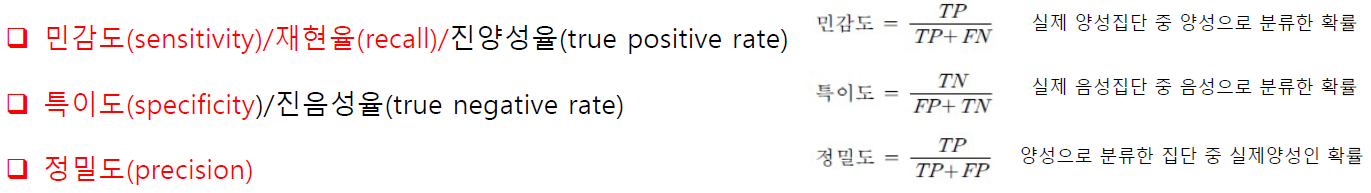

## 4. F1 스코어(score)
### F1 스코어 : 정밀도와 재현율을 결합한 지표

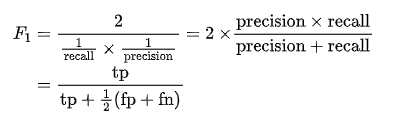

In [56]:
from sklearn.metrics import f1_score
f1=f1_score(y_test,pred)
print("F1 스코어:",f1)

F1 스코어: 0.8417508417508417


In [58]:
print('f1_0.3:',round(f1_score(y_test,prob['pred_0.3']),4))
print('f1_0.4:',round(f1_score(y_test,prob['pred_0.4']),4))
print('f1_0.5:',round(f1_score(y_test,prob['pred_0.5']),4))
print('f1_0.6:',round(f1_score(y_test,prob['pred_0.6']),4))
print('f1_0.7:',round(f1_score(y_test,prob['pred_0.7']),4))

f1_0.3: 0.8478
f1_0.4: 0.8491
f1_0.5: 0.8418
f1_0.6: 0.8459
f1_0.7: 0.8092


## 5. ROC 곡선과 AUC
### 매우 매우 중요. 공모전에서도 평가 기준으로 자주 사용됨

## ROC(Receiver Operation Characteristic Curve)
- FPR(False Positive Rate)를 x 축으로, TPR(True Positive Rate)을 y축으로 하는 곡선
- FPR의 변화에 따른 TPR의 변화가 곡선 형태로 나타난다.
- TPR은 앞서 설명한 민감도, 재현율과 동일하다.
- FPR은 Negative로 예측한 데이터 중에 실제 Positive인 데이터의 비율이다.
- FPR = 1- 특이성

### FPR에 변화를 주는 방법

- 임곗값을 변동해주면 된다.
- 임곗값이 1이면 Negative를 Positive로 예측을 할 수 없기에 FPR은 0 이 된다.
- 임곗값이 0이면 Negative로 예측을 할수가 없기 때문에 FPR은 1이 된다. 

### 목적
- FPR이 높을 때 (아무 데이터나 P로 예측할 때) TPR이 높은 것은 당연한 것
- 즉 FPR이 낮을 때 (N을 P로 예측하지 않을 때) TPR이 높은 모델을 원한다

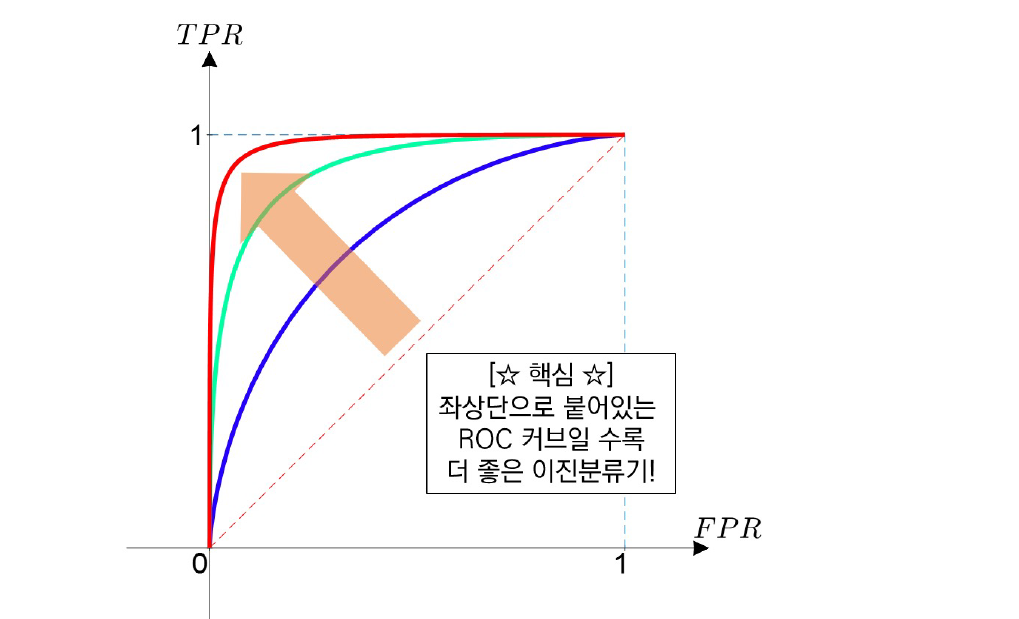

### roc_curve() 함수

#### 입력 파라미터 
- y_true : 실제 값
- y_score : predict_proba에서 반환된 1일 확률 (예측 확률)
#### 반환 값 
- fpr : fpr 값을 array로 반환
- tpr : tpr 값을 array로 반환
- threshold : threshold 값을 array로 반환

In [60]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 확률 추출
pred_proba_1=prob[1]

fprs,tprs,thresholds=roc_curve(y_test,pred_proba_1)

In [64]:
# 반환된 array 값들을 결합하여 roc 데이터 생성
roc=pd.DataFrame(thresholds)
roc['fprs']=fprs
roc['tprs']=tprs
roc

,0,fprs,tprs
0,1.986873,0.000000,0.000000
1,0.986873,0.000000,0.006993
2,0.906829,0.000000,0.265734
3,0.905916,0.017857,0.265734
4,0.878056,0.017857,0.370629
...,...,...,...
66,0.321198,0.875000,0.986014
67,0.311702,0.892857,0.986014
68,0.311404,0.892857,0.993007
69,0.135015,1.000000,0.993007


### ROC_curve 그리기

In [68]:
import matplotlib.pyplot as plt

def plot_roc_curve(fper,tper):
    plt.plot(fper,tper,color="red",label="ROC")
    plt.plot([0,1],[0,1],color="green",linestyle='--')
    plt.xlabel('FPR')
    plt.xlabel('TPR')
    plt.title("ROC_Curve")
    plt.legend()
    plt.show()
    

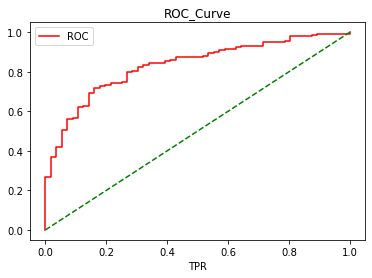

In [69]:
plot_roc_curve(fprs,tprs)

## AUC(Area Under Curve)
### ROC 곡선 아래의 넓이를 계산한다
### 0.5 ~ 1 사이의 값으로 클수록 좋은 모델임을 의미한다

In [72]:
# AUC 구하기
from sklearn.metrics import roc_auc_score
pred_proba_1=prob[1]

print('ROC_AUC_score:',roc_auc_score(y_test,pred_proba_1))

ROC_AUC_score: 0.8322927072927073
